## Исследовательский анализ данных в Python и проверка гипотез

# Цели проекта

- Провести исследовательский анализ данных в Python, чтобы выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года
- Проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.

# Задачи проекта
- Загрузка данных и знакомство с ними
- Предобработка данных и подготовка их к исследованию
- Исследовательский анализ данных
- Статистический анализ данных
- Общие выводы и рекомендации

## Данные для исследования

Первый датасет 
final_tickets_orders_df.csv включает информацию обо всех заказах билетов,<br>
совершённых с двух типов устройств — мобильных и стационарных. <br>
Поля датасета соответствуют таблице purchases, с которой вы работали в предыдущих заданиях:<br>
order_id — уникальный идентификатор заказа.<br>
user_id — уникальный идентификатор пользователя.<br>
created_dt_msk — дата создания заказа (московское время).<br>
created_ts_msk — дата и время создания заказа (московское время).<br>
event_id — идентификатор мероприятия из таблицы events.<br>
cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.<br>
age_limit — возрастное ограничение мероприятия.<br>
currency_code — валюта оплаты, например rub для российских рублей. <br>
device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, <br> 
desktop для стационарных. <br>
revenue — выручка от заказа.<br>
service_name — название билетного оператора. <br>
tickets_count — количество купленных билетов.<br>
total — общая сумма заказа.<br>
В данные также был добавлен столбец days_since_prev с количеством дней с предыдущей покупки для каждого пользователя.<br> 
Если покупки не было, то данные содержат пропуск.<br>


Второй датасет final_tickets_events_df содержит информацию о событиях,<br> 
включая город и регион события, а также информацию о площадке проведения мероприятия.<br> 
Обратите внимание, что из данных исключили фильмы, ведь, как было видно на дашборде, <br> 
событий такого типа не так много. Датасет содержит такие поля:<br>
event_id — уникальный идентификатор мероприятия.<br>
event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.<br>
event_type_description — описание типа мероприятия.<br>
event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.<br>
organizers — организаторы мероприятия.<br>
region_name — название региона.<br>
city_name — название города.<br>
venue_id — уникальный идентификатор площадки.<br>
venue_name — название площадки.<br>
venue_address — адрес площадки.<br>
Анализ данных в предыдущей части проекта показал, что выручка от заказов представлена в двух валютах —<br>
российских рублях и казахстанских тенге.<br> 


Для этого в вашем распоряжении будет датасет <br>
final_tickets_tenge_df.csv с информацией о курсе тенге к российскому рублю за 2024 год.<br> 
Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:<br>
nominal — номинал (100 тенге).<br>
data — дата.<br>
curs — курс тенге к рублю.<br>
cdx — обозначение валюты (kzt).<br>

In [130]:
#Импорт пакетов
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from matplotlib.ticker import PercentFormatter
plt.rcParams["figure.figsize"] = (12,8) 

In [131]:
#Загрузка данных
df_orders=pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
df_events=pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
df_tenge=pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [132]:
display(df_orders.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [133]:
display(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

None

In [134]:
display(df_events.head())

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [135]:
display(df_events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


None

In [136]:
display(df_tenge.head())

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [137]:
display(df_tenge.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


None

# Вывод 
- По датасету df_orders пропуски имееются только в столбце days_since_prev необходимо привести данные по столбцам  created_dt_ms, created_ts_msk к типу datetime. Так как пропусков не так много не имеет смысл уьирать их снижая размерность таблицы. 
- По датасетам df_events и df_tenge пропусков нет ни по одному столбцу, по столбцу data в df_tenge надо тоже привести к datetime.
- Все остальные столбцы приведены в соответствие.

In [139]:
display(df_orders.cinema_circuit.unique())

array(['нет', 'Другое', 'Киномакс', 'КиноСити', 'Москино', 'ЦентрФильм'],
      dtype=object)

In [140]:
display(df_orders.age_limit.unique())

array([16,  0, 18, 12,  6], dtype=int64)

In [141]:
display(df_orders.currency_code.unique())

array(['rub', 'kzt'], dtype=object)

In [142]:
display(df_orders.device_type_canonical.unique())

array(['mobile', 'desktop'], dtype=object)

In [143]:
display(df_orders.service_name.unique())

array(['Край билетов', 'Мой билет', 'За билетом!', 'Лови билет!',
       'Билеты без проблем', 'Облачко', 'Лучшие билеты', 'Прачечная',
       'Быстробилет', 'Дом культуры', 'Весь в билетах', 'Билеты в руки',
       'Тебе билет!', 'Show_ticket', 'Городской дом культуры', 'Яблоко',
       'Билет по телефону', 'Выступления.ру', 'Росбилет',
       'Шоу начинается!', 'Мир касс', 'Восьмёрка', 'Телебилет',
       'Crazy ticket!', 'Реестр', 'Быстрый кассир', 'КарандашРУ',
       'Радио ticket', 'Дырокол', 'Вперёд!', 'Кино билет', 'Цвет и билет',
       'Зе Бест!', 'Тех билет', 'Лимоны', 'Билеты в интернете'],
      dtype=object)

In [144]:
display(df_orders.days_since_prev.unique())

array([ nan,  75.,  83.,  19.,  16.,   0.,   1.,  74.,  13.,  25.,  30.,
        29.,  23.,  63.,  14.,  11.,   7.,   5.,  26.,  10.,  15.,   3.,
         4.,  70.,  20.,  35.,  33.,  22.,  53.,  39.,  31.,  17.,  27.,
        40.,  24.,  12.,  47.,   9.,   2.,   6.,  51.,  55.,  18.,  68.,
        52.,   8.,  71.,  28.,  46., 134.,  41.,  79.,  86.,  60.,  49.,
       122.,  32.,  78.,  80.,  38.,  37.,  85.,  88.,  43., 128.,  61.,
       108.,  21.,  50.,  81., 137.,  48.,  45.,  94.,  34.,  84., 107.,
        42.,  44.,  56.,  82., 123., 101.,  69., 115.,  97.,  36., 112.,
        65.,  99.,  67.,  91.,  95.,  57.,  77.,  58.,  73.,  59., 132.,
        93.,  72., 129.,  62., 118.,  96., 100., 105.,  54.,  76., 131.,
       104.,  92., 114., 127., 109., 121.,  66.,  64., 110., 103., 148.,
        90.,  98.,  89., 120., 139., 144., 102.,  87., 135., 116., 141.,
       111., 124., 106., 113., 145., 117., 142., 130., 126., 146., 140.,
       125., 136., 133., 147., 119., 138., 143.])

In [145]:
display(df_events.event_type_description.unique())

array(['спектакль', 'балет', 'мюзикл', 'опера', 'концерт', 'шоу', 'ёлка',
       'цирковое шоу', 'событие', 'фестиваль', 'спортивное мероприятие',
       'выставка', 'спорт', 'оперетта', 'экскурсия', 'рок-мюзикл',
       'музыкальный спектакль', 'снегурочка', 'подарок',
       'кукольный спектакль'], dtype=object)

In [146]:
display(df_events.event_type_main.unique())

array(['театр', 'концерты', 'ёлки', 'другое', 'стендап', 'выставки',
       'спорт'], dtype=object)

In [147]:
display(df_events.organizers.unique())

array(['№4893', '№1931', '№4896', ..., '№4817', '№5105', '№4552'],
      dtype=object)

In [148]:
display(df_events.region_name.unique())

array(['Североярская область', 'Светополянский округ',
       'Каменевский регион', 'Лесодальний край', 'Медовская область',
       'Широковская область', 'Тепляковская область', 'Травяная область',
       'Зоринский регион', 'Серебринская область', 'Яблоневская область',
       'Глиногорская область', 'Речиновская область', 'Озернинский край',
       'Горицветская область', 'Солнечнореченская область',
       'Травиницкий округ', 'Солнечноземская область',
       'Ключеводский округ', 'Островная область', 'Луговая область',
       'Каменноозёрный край', 'Лесостепной край', 'Зеленоградский округ',
       'Поленовский край', 'Лугоградская область', 'Синегорский регион',
       'Малиновая область', 'Речицкая область', 'Дальнеземская область',
       'Заречная область', 'Североозёрский округ', 'Дальнезорский край',
       'Малиновоярский округ', 'Сосновская область',
       'Златопольский округ', 'Ягодиновская область',
       'Берестовский округ', 'Золотоключевской край',
       'Каменно

In [149]:
display(df_events.venue_name.unique())

array(['Кладбище искусств "Проблема" и партнеры',
       'Лекции по искусству "Свет" Групп', 'Кинокомитет "Золотая" Инк',
       ..., 'Эстрадный театр "Вытяжка" Лимитед',
       'Школа композиции "Окно" Лимитед',
       'Клуб современных танцев "Кофе" Групп'], dtype=object)

In [150]:
display(df_events.city_name.unique())

array(['Озёрск', 'Глиноград', 'Глиногорск', 'Родниковец', 'Радужсвет',
       'Радужнополье', 'Горнодолинск', 'Родниковск', 'Луговинск',
       'Озёрчане', 'Светополье', 'Теплоозеро', 'Дальнесветск', 'Лесоярич',
       'Островецк', 'Озёрово', 'Сосновечин', 'Ягодиновка', 'Родниковецк',
       'Глинополье', 'Акбасты', 'Лесоводск', 'Синеводов', 'Ордакент',
       'Крутовинск', 'Шаныртау', 'Дальнозолотск', 'Кристалевск',
       'Вишнёво', 'Тихоярск', 'Сарыжар', 'Радужанов', 'Теплоозёрск',
       'Каменевский', 'Островополь', 'Кенесар', 'Рощино', 'Верховино',
       'Сосновогорец', 'Дальнозерск', 'Солчелуг', 'Дальнополин', 'Кумсай',
       'Каменосветск', 'Речинцево', 'Светогория', 'Поленоозёрово',
       'Поляногорье', 'Дальнесоснов', 'Заречиновка', 'Радужнояр',
       'Каменский', 'Речевинец', 'Ордасай', 'Песковино', 'Медовецк',
       'Акбастау', 'Луговаярово', 'Травяниново', 'Каражол', 'Глиногорь',
       'Дальнесветин', 'Горнополец', 'Травогород', 'Серебрянка',
       'Сосноград', 'Мал

In [151]:
display(df_tenge.cdx.unique())

array(['kzt'], dtype=object)

In [152]:
display(df_tenge.nominal.unique())

array([100], dtype=int64)

**Вывод**: По трем датасетам были проверены все категориальные переменные. Не было обнаружено значений, которые могут обозначать пропуски в данных или отсутствие информации за исключчением days_since_prev.

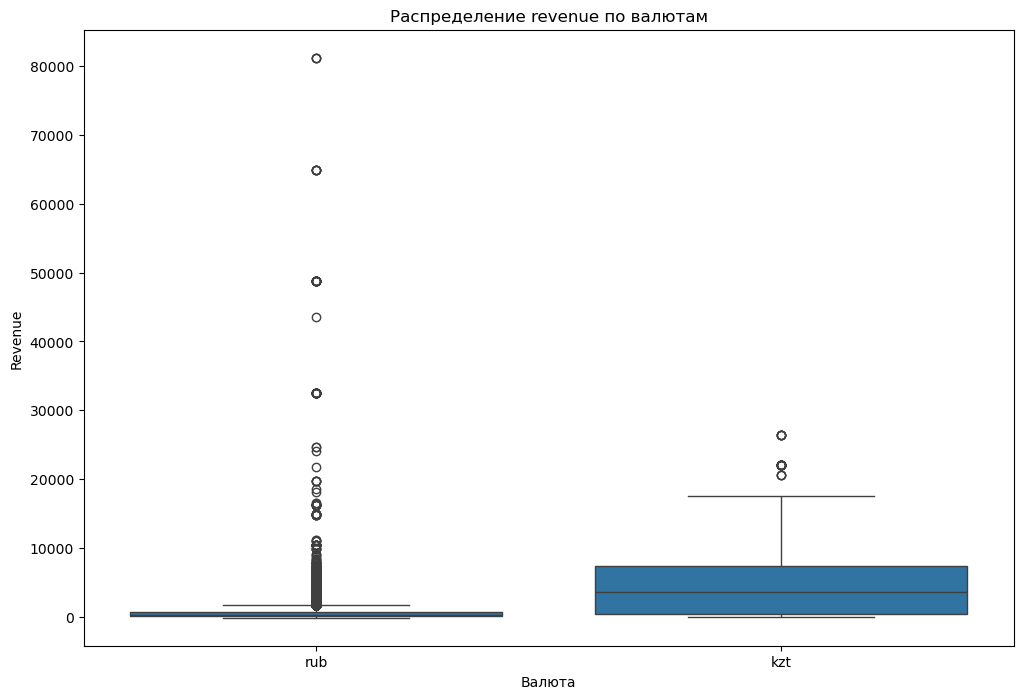

In [154]:
sns.boxplot(x='currency_code',           # категория по оси X
            y='revenue',
            data=df_orders.query("currency_code in ['rub', 'kzt']"),
            order=['rub', 'kzt'])        # фиксируем порядок RU&rarr;KZ

plt.title('Распределение revenue по валютам')
plt.xlabel('Валюта')
plt.ylabel('Revenue')
plt.show()

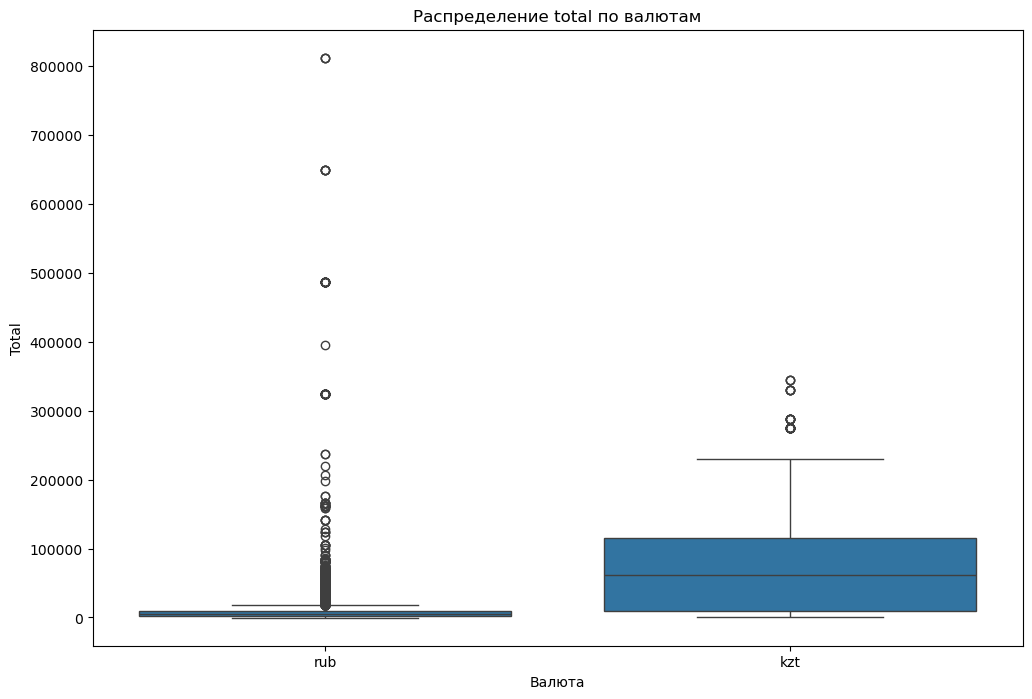

In [155]:
sns.boxplot(x='currency_code',           # категория по оси X
            y='total',
            data=df_orders.query("currency_code in ['rub', 'kzt']"),
            order=['rub', 'kzt'])        # фиксируем порядок RU&rarr;KZ

plt.title('Распределение total по валютам')
plt.xlabel('Валюта')
plt.ylabel('Total')
plt.show()

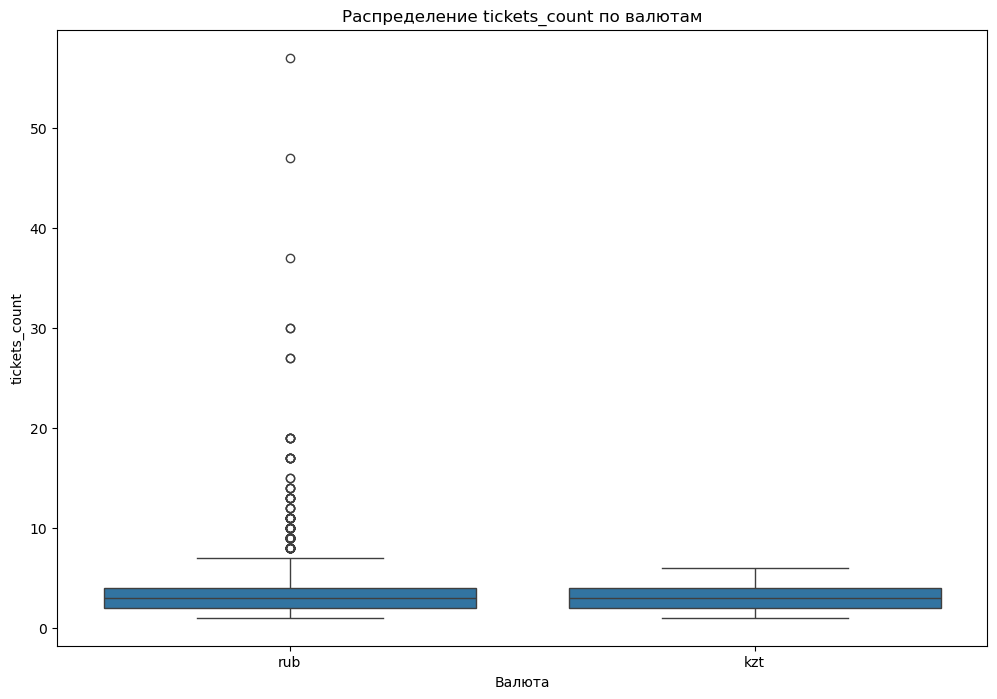

In [156]:
sns.boxplot(x='currency_code',           # категория по оси X
            y='tickets_count',
            data=df_orders.query("currency_code in ['rub', 'kzt']"),
            order=['rub', 'kzt'])        # фиксируем порядок RU&rarr;KZ

plt.title('Распределение tickets_count по валютам')
plt.xlabel('Валюта')
plt.ylabel('tickets_count')
plt.show()

In [157]:
# вычисляем 99-е перцентили сразу для обоих столбцов
q99 = df_orders[['tickets_count', 'revenue']].quantile(0.99)

# применяем условие отбора
df_orders_f = df_orders[
    (df_orders['tickets_count'] <= q99['tickets_count']) &
    (df_orders['revenue']       <= q99['revenue'])
]

In [158]:
#Разобьем данные по валютам
df_orders_rub=df_orders_f[df_orders_f['currency_code']=='rub'].copy()
df_orders_kzt=df_orders_f[df_orders_f['currency_code']=='kzt'].copy()

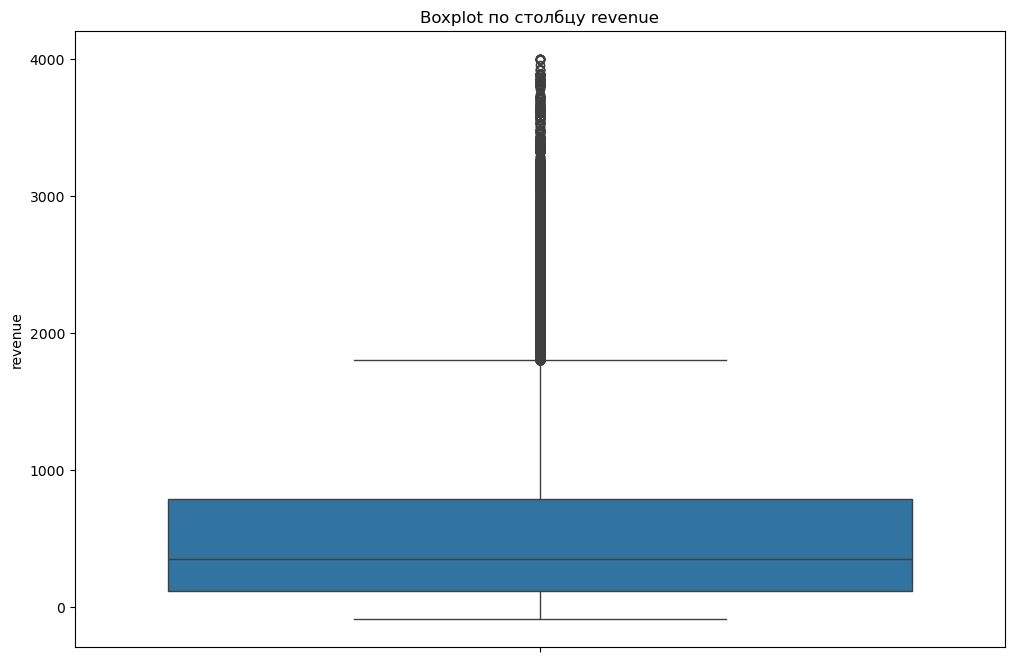

In [159]:
sns.boxplot(data=df_orders_rub['revenue'])              # или y=... для горизонтального
plt.title('Boxplot по столбцу revenue')
plt.show()

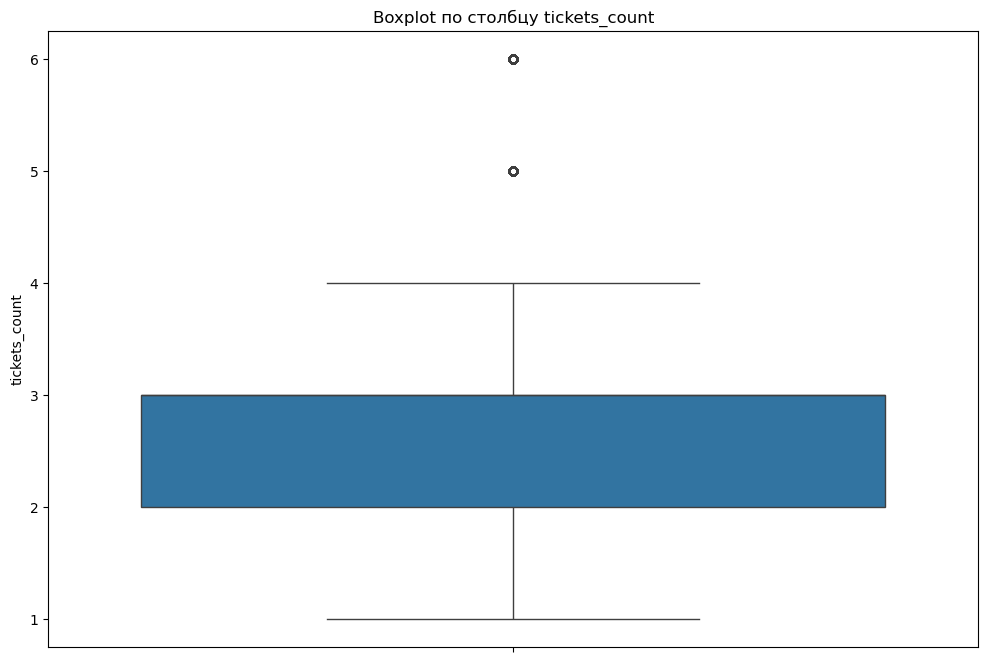

In [160]:
sns.boxplot(data=df_orders_rub['tickets_count'])              # или y=... для горизонтального
plt.title('Boxplot по столбцу tickets_count')
plt.show()

In [161]:
df_orders_rub['tickets_count'].value_counts()

tickets_count
3    90515
2    82365
4    53630
1    41144
5    13206
6     4163
Name: count, dtype: int64

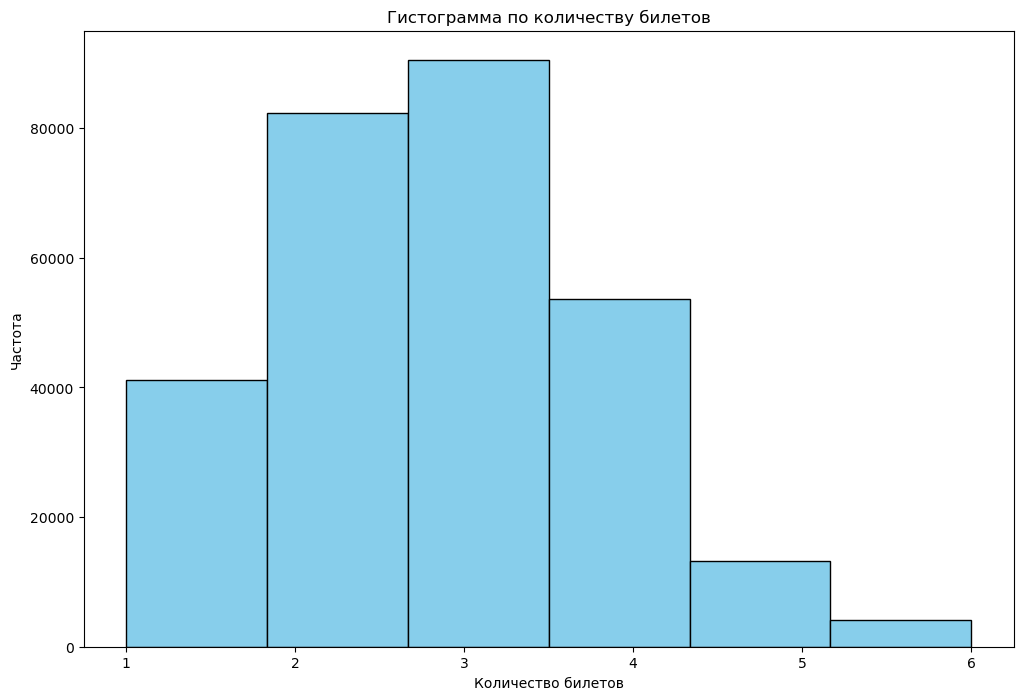

In [162]:
# Plotting a basic histogram
plt.hist(df_orders_rub['tickets_count'], bins=6, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Количество билетов')
plt.ylabel('Частота')
plt.title('Гистограмма по количеству билетов')
 
# Display the plot
plt.show()

In [163]:
df_orders_kzt['tickets_count'].value_counts()

tickets_count
2    1009
1     592
3     544
4     399
5     138
6      50
Name: count, dtype: int64

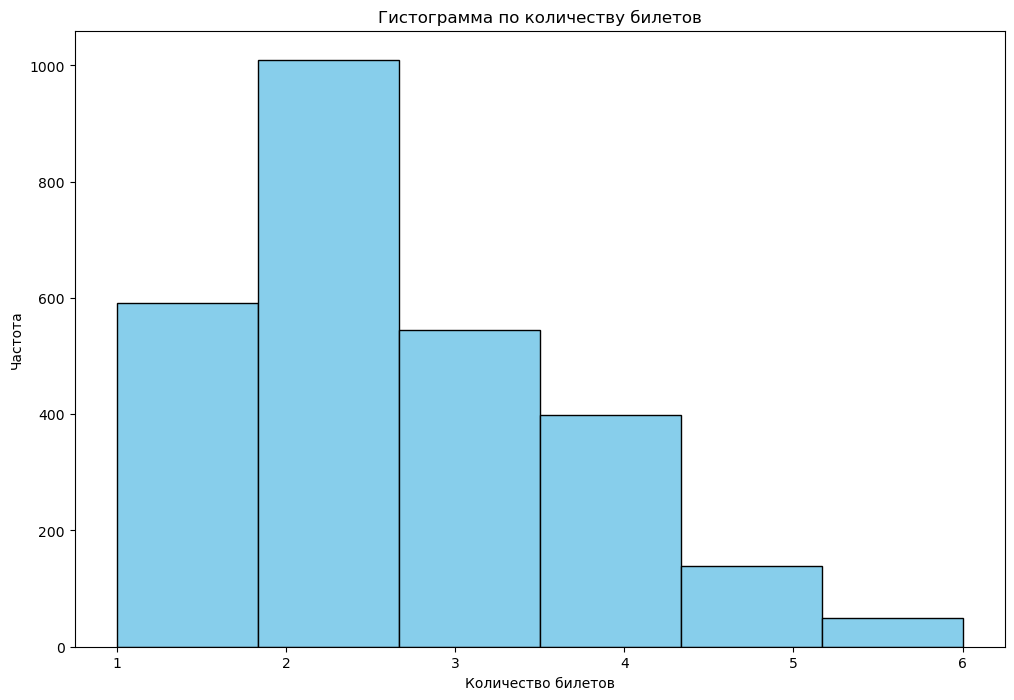

In [164]:
# Plotting a basic histogram
plt.hist(df_orders_kzt['tickets_count'], bins=6, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Количество билетов')
plt.ylabel('Частота')
plt.title('Гистограмма по количеству билетов')
 
# Display the plot
plt.show()

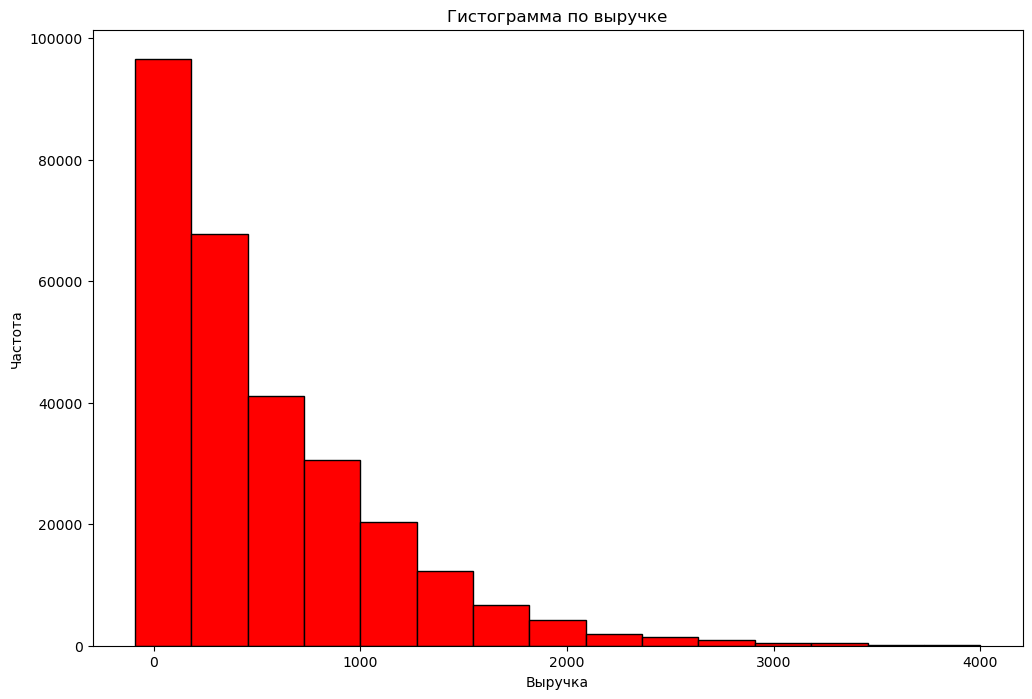

In [165]:
# Plotting a basic histogram
plt.hist(df_orders_rub['revenue'], bins=15, color='red', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.title('Гистограмма по выручке')
 
# Display the plot
plt.show()

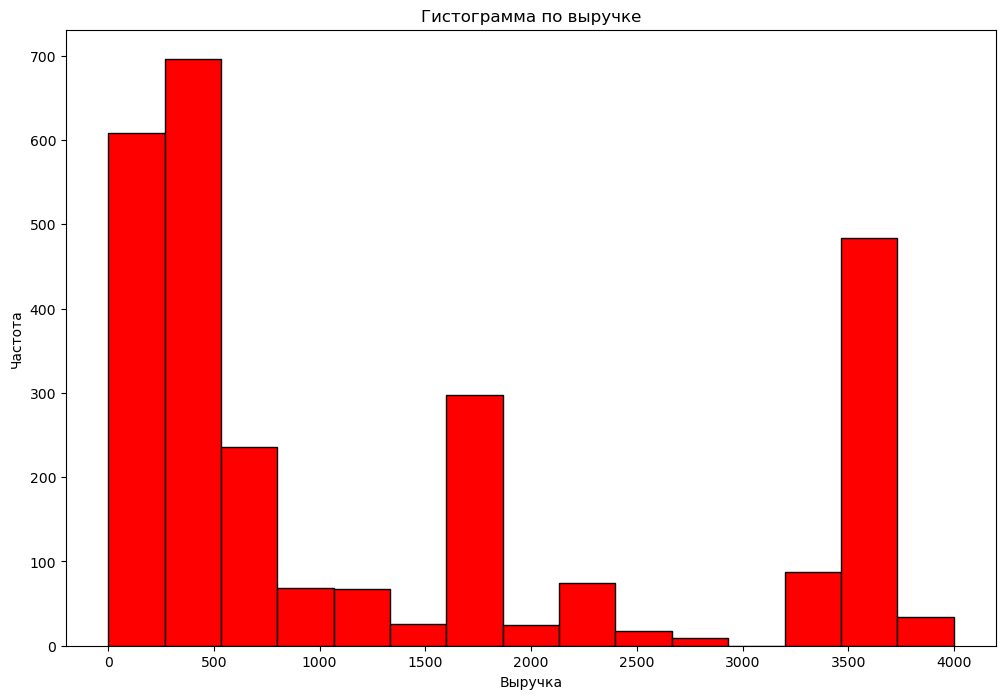

In [166]:
# Plotting a basic histogram
plt.hist(df_orders_kzt['revenue'], bins=15, color='red', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.title('Гистограмма по выручке')
 
# Display the plot
plt.show()

**Вывод** Удалив выбросы и разделив распределение по валютам можно сказать, что в РФ наиболее <br> 
числа по количеству покупки билетов 3 и 2, в то время в Казахстане 2.<br>
По выручк в РФ виден ниспалающий график с наибольшей частотностью около 0, <br>
по Казахстану сказать так нельзя там два пика на 500 и 3500.


In [168]:
# 1. Проверить, есть ли дубликаты (True/False)
are_there_duplicates = df_orders_rub.duplicated().any()
print("Есть дубликаты в датафрейме? -", are_there_duplicates)
if are_there_duplicates==False:
    print('Строк с явными дубликатами не обнаружено')
else:
    # 2. Показать конкретные строки, которые являются дубликатами
    duplicate_rows = df_orders_rub[df_orders_rub.duplicated(keep=False)]
    print("Строки с дубликатами:\n", duplicate_rows)

Есть дубликаты в датафрейме? - False
Строк с явными дубликатами не обнаружено


In [169]:
# 1. Проверить, есть ли дубликаты (True/False)
are_there_duplicates_kzt = df_orders_kzt.duplicated().any()
print("Есть дубликаты в датафрейме? -", are_there_duplicates_kzt)
if are_there_duplicates_kzt==False:
    print('Строк с явными дубликатами не обнаружено')
else:
    # 2. Показать конкретные строки, которые являются дубликатами
    duplicate_rows_kzt = df_orders_kzt[df_orders_kzt.duplicated(keep=False)]
    print("Строки с дубликатами:\n", duplicate_rows_kzt)

Есть дубликаты в датафрейме? - False
Строк с явными дубликатами не обнаружено


In [170]:
# 1. Проверить, есть ли дубликаты (True/False)
are_there_duplicates_ev = df_events.duplicated().any()
print("Есть дубликаты в датафрейме? -", are_there_duplicates_ev)
if are_there_duplicates_ev==False:
    print('Строк с явными дубликатами не обнаружено')
else:
    # 2. Показать конкретные строки, которые являются дубликатами
    duplicate_rows_ev = df_events[df_events.duplicated(keep=False)]
    print("Строки с дубликатами:\n", duplicate_rows_ev)

Есть дубликаты в датафрейме? - False
Строк с явными дубликатами не обнаружено


In [171]:
# 1. Проверить, есть ли дубликаты (True/False)
are_there_duplicates_tng = df_tenge.duplicated().any()
print("Есть дубликаты в датафрейме? -", are_there_duplicates_tng)
if are_there_duplicates_tng==False:
    print('Строк с явными дубликатами не обнаружено')
else:
    # 2. Показать конкретные строки, которые являются дубликатами
    duplicate_rows_tng = df_orders_tng[df_orders_tng.duplicated(keep=False)]
    print("Строки с дубликатами:\n", duplicate_rows_tng)

Есть дубликаты в датафрейме? - False
Строк с явными дубликатами не обнаружено


In [172]:
#Изменим формат данных 
df_orders_rub['created_dt_msk']=df_orders_rub['created_dt_msk'].astype('datetime64[ns]', errors='ignore')
df_orders_rub['created_ts_msk']=df_orders_rub['created_ts_msk'].astype('datetime64[ns]', errors='ignore')
df_orders_kzt['created_dt_msk']=df_orders_kzt['created_dt_msk'].astype('datetime64[ns]', errors='ignore')
df_orders_kzt['created_ts_msk']=df_orders_kzt['created_ts_msk'].astype('datetime64[ns]', errors='ignore')

In [173]:
df_tenge['data']=df_tenge['data'].astype('datetime64[ns]', errors='ignore')

In [174]:
df_orders_rub['revenue_rub']=df_orders_rub['revenue']

merged = (
    df_orders_kzt
      .merge(df_tenge[['data', 'curs']], left_on='created_dt_msk', right_on='data', how='inner')   # соединяем по &laquo;key&raquo;
      .assign(revenue_rub = lambda x: round(x['revenue'] * x['curs'] * 0.01,2))          # новый столбец-произведение
)

In [175]:
# 1. Какие именно колонки убираем?
cols_to_drop_df_orders_rub = ['revenue']   # &larr; свои названия
cols_to_drop_df_merged = ['revenue', 'data', 'curs']   # &larr; свои названия

df1_clean = df_orders_rub.drop(columns=cols_to_drop_df_orders_rub)
df2_clean = merged.drop(columns=cols_to_drop_df_merged)

# 2-а. ВЕРТИКАЛЬНОЕ объединение (stack/append ─ &laquo;списком вниз&raquo;)
#     Подойдёт, когда набор колонок совпадает.
df_all = pd.concat([df1_clean, df2_clean], ignore_index=True)

In [176]:
display(df_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287755 entries, 0 to 287754
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               287755 non-null  int64         
 1   user_id                287755 non-null  object        
 2   created_dt_msk         287755 non-null  datetime64[ns]
 3   created_ts_msk         287755 non-null  datetime64[ns]
 4   event_id               287755 non-null  int64         
 5   cinema_circuit         287755 non-null  object        
 6   age_limit              287755 non-null  int64         
 7   currency_code          287755 non-null  object        
 8   device_type_canonical  287755 non-null  object        
 9   service_name           287755 non-null  object        
 10  tickets_count          287755 non-null  int64         
 11  total                  287755 non-null  float64       
 12  days_since_prev        266245 non-null  floa

None

In [177]:
df_all['one_ticket_revenue_rub']=df_all['revenue_rub']/df_all['tickets_count']

In [178]:
df_all['month']=df_all['created_dt_msk'].dt.month

In [179]:
def seasons(month: int) -> str:
    if   month in (12, 1, 2):
        return 'зима'
    elif month in (3, 4, 5):
        return 'весна'
    elif month in (6, 7, 8):
        return 'лето'
    elif month in (9, 10, 11):
        return 'осень'
    else:
        return None          # на случай &laquo;битых&raquo; значений


df_all['season'] = df_all['month'].apply(seasons)

In [180]:
# Удаление неявных дубликатов
cols_wo_order_id = [c for c in df_all.columns if c != 'order_id']
df_all=df_all.drop_duplicates(subset=cols_wo_order_id)
print(df_all.shape[0])

287725


***Вывод***: Было отобрано 287725 наблюдений, явных дубликатов не было обнаржено, было удалено 30 наблюдений признанных неявными дубликатов и 2 наблюдения по 99 персентилю, также был поменен тип данных по наюлюдениям типа дата и сконструированны необходимые столбцы по месяцам, сезонам .

## Исследовательский анализ данных

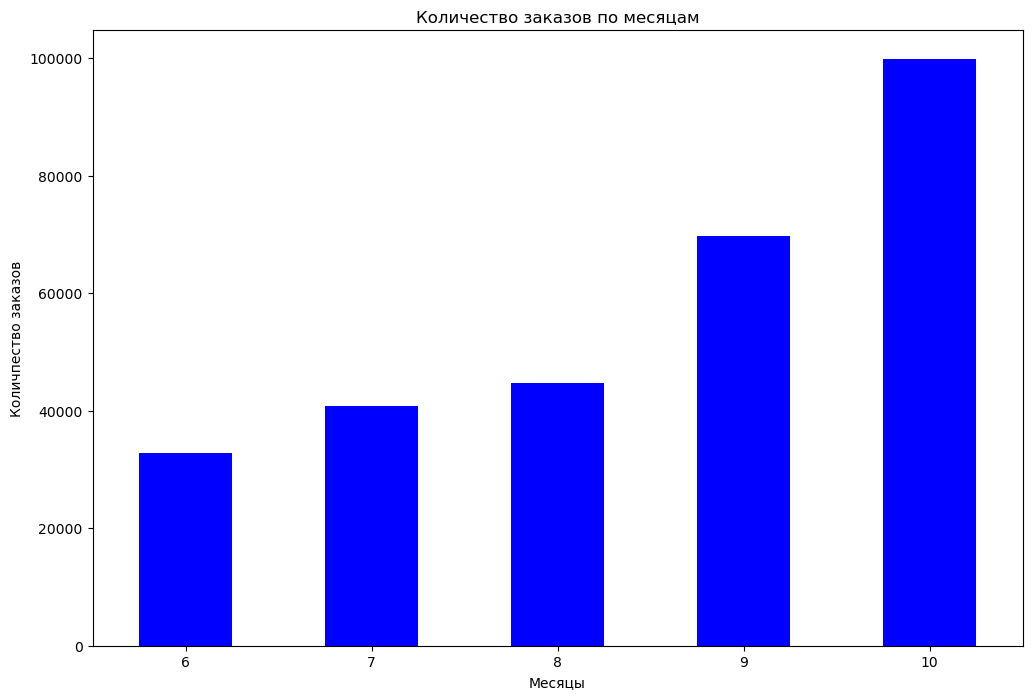

In [183]:
df_agg = df_all.groupby('month').agg({'order_id':'count'}) # Сделайте группировку по столбцу `Churn`

df_agg.plot.bar(legend=False,
                title='Количество заказов по месяцам',
                ylabel='Количпество заказов',
                xlabel='Месяцы',
		        rot=0,
                color='blue')

# Отображаем график
plt.show()

In [184]:
df_final=df_all.merge(df_events, on='event_id', how='inner')

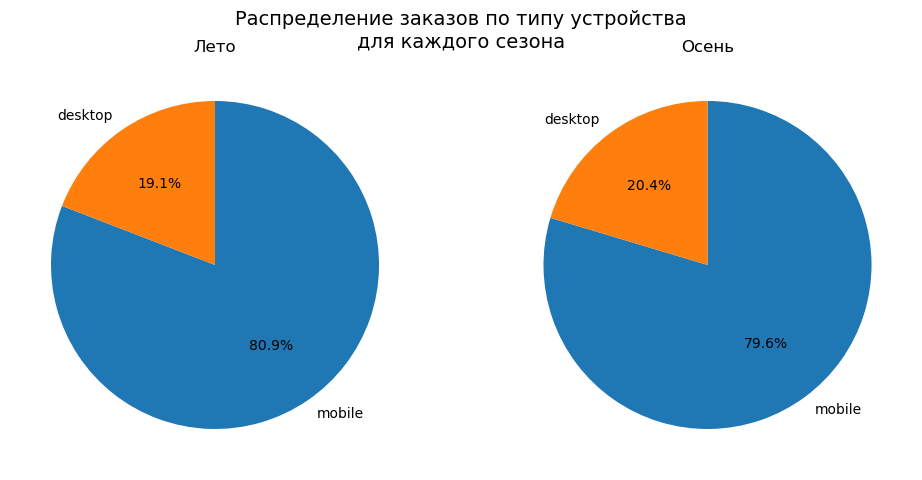

In [185]:
def pie_by_season(df,
                  season_col='season',
                  device_col='device_type_canonical',
                  order_col='order_id',
                  seasons=('лето', 'осень')):
    """
    Для каждого сезона из `seasons` строит круговую диаграмму,
    показывающую распределение заказов (order_id) по типам устройств.
    """
    n = len(seasons)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    if n == 1:                                # если только один сезон
        axes = [axes]

    for ax, season in zip(axes, seasons):
        subset = df.loc[df[season_col] == season]

        # сколько уникальных order_id пришлось на каждый canonical_type
        counts = (subset
                  .groupby(device_col)[order_col]
                  .nunique()              # если строки уникальны сами по себе &rarr; .size()
                  .sort_values(ascending=False))

        ax.pie(
            counts,
            labels=counts.index,
            autopct='%1.1f%%',
            startangle=90,
            counterclock=False
        )
        ax.set_title(season.capitalize())

    plt.suptitle('Распределение заказов по типу устройства\nдля каждого сезона',
                 fontsize=14, y=0.95)
    plt.tight_layout()
    plt.show()

# ── вызов ──────────────────────────────────────────────────────
pie_by_season(df_final)  

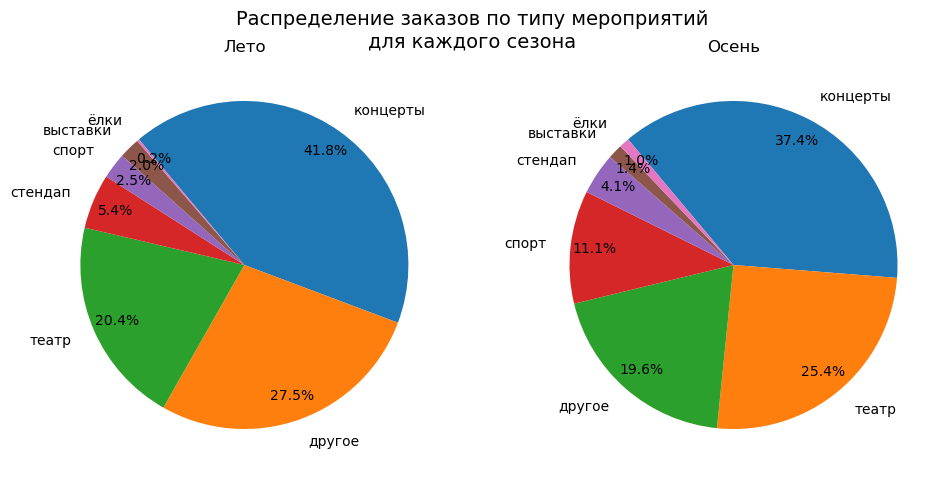

In [186]:
def pie_by_season(df,
                  season_col='season',
                  device_col='event_type_main',
                  order_col='order_id',
                  seasons=('лето', 'осень')):
    """
    Для каждого сезона из `seasons` строит круговую диаграмму,
    показывающую распределение заказов (order_id) по типам мероприятий.
    """
    labeldistance = 1.15 
    pctdistance   = 0.85                   # проценты ещё чуть дальше
    n = len(seasons)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    if n == 1:                                # если только один сезон
        axes = [axes]

    for ax, season in zip(axes, seasons):
        subset = df.loc[df[season_col] == season]

        # сколько уникальных order_id пришлось на каждый canonical_type
        counts = (subset
                  .groupby(device_col)[order_col]
                  .nunique()              # если строки уникальны сами по себе &rarr; .size()
                  .sort_values(ascending=False))

        ax.pie(
            counts,
            labels=counts.index,
            labeldistance=labeldistance,
            pctdistance= pctdistance,
            autopct='%1.1f%%',
            startangle=130,
            counterclock=False
        )
        ax.set_title(season.capitalize())

    plt.suptitle('Распределение заказов по типу мероприятий\nдля каждого сезона',
                 fontsize=14, y=0.95)
    plt.tight_layout()
    plt.show()

# ── вызов ──────────────────────────────────────────────────────
pie_by_season(df_final)  

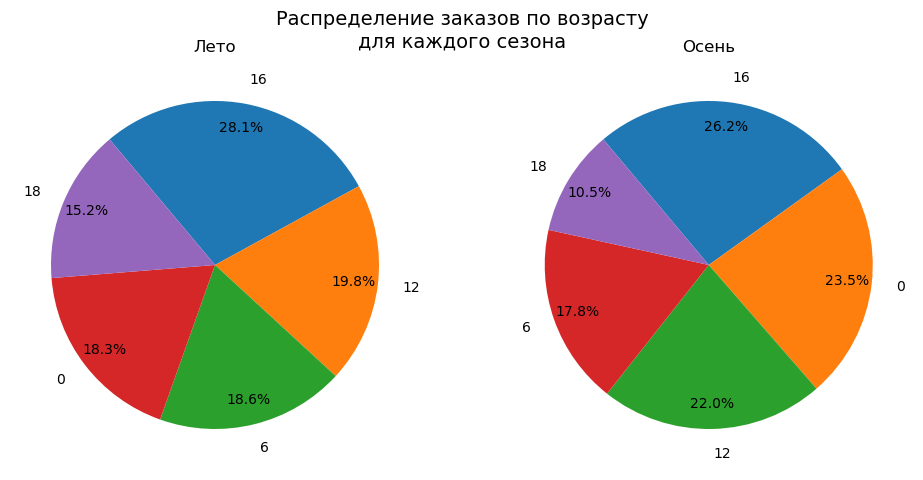

In [187]:
def pie_by_season(df,
                  season_col='season',
                  device_col='age_limit',
                  order_col='order_id',
                  seasons=('лето', 'осень')):
    """
    Для каждого сезона из `seasons` строит круговую диаграмму,
    показывающую распределение заказов (order_id) по возрасту.
    """
    labeldistance = 1.15 
    pctdistance   = 0.85                   # проценты ещё чуть дальше
    n = len(seasons)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    if n == 1:                                # если только один сезон
        axes = [axes]

    for ax, season in zip(axes, seasons):
        subset = df.loc[df[season_col] == season]

        # сколько уникальных order_id пришлось на каждый canonical_type
        counts = (subset
                  .groupby(device_col)[order_col]
                  .nunique()              # если строки уникальны сами по себе &rarr; .size()
                  .sort_values(ascending=False))

        ax.pie(
            counts,
            labels=counts.index,
            labeldistance=labeldistance,
            pctdistance= pctdistance,
            autopct='%1.1f%%',
            startangle=130,
            counterclock=False
        )
        ax.set_title(season.capitalize())

    plt.suptitle('Распределение заказов по возрасту\nдля каждого сезона',
                 fontsize=14, y=0.95)
    plt.tight_layout()
    plt.show()

# ── вызов ──────────────────────────────────────────────────────
pie_by_season(df_final)  

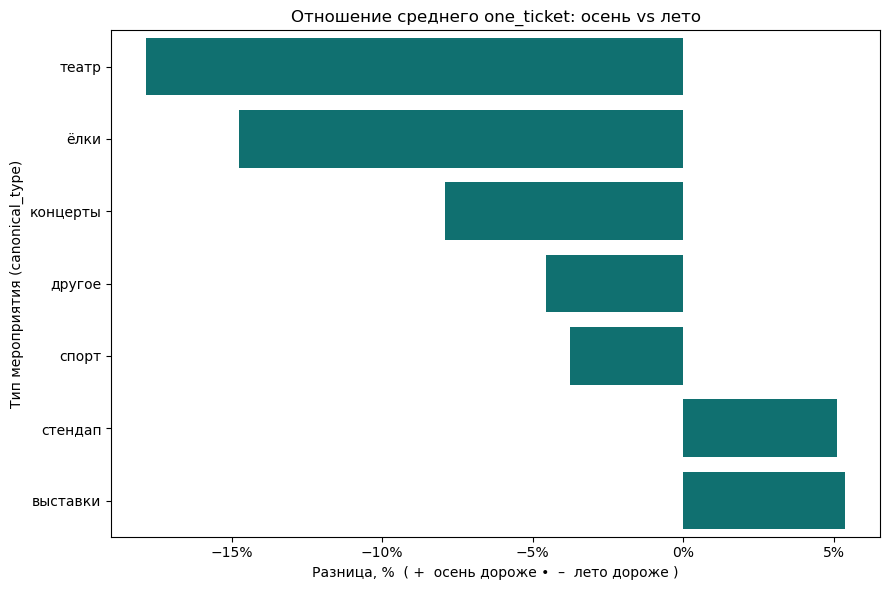

In [188]:
# --- 1. Агрегация ------------------------------------------------------------
agg = (df_final
       .query("season in ['лето', 'осень']")
       .groupby(['event_type_main', 'season'])['one_ticket_revenue_rub']
       .mean()
       .unstack())                       # колонки:  лето | осень

# --- 2. Нормированный показатель в процентах --------------------------------
ratio_pct = ((agg['осень'] / agg['лето']) - 1) * 100          # &rarr; %
ratio_pct = ratio_pct.dropna().sort_values()

# --- 3. Визуализация ---------------------------------------------------------
plt.figure(figsize=(9, 6))
ax = sns.barplot(
    x=ratio_pct.values,
    y=ratio_pct.index,
    orient='h',
    color='teal'
)

# формат оси Х как проценты
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# косметика
plt.title('Отношение среднего one_ticket: осень vs лето')
plt.xlabel('Разница, %  ( +  осень дороже •  –  лето дороже )')
plt.ylabel('Тип мероприятия (canonical_type)')
plt.tight_layout()
plt.show()

In [189]:
display(agg)

season,лето,осень
event_type_main,,
выставки,86.416198,91.066619
другое,80.623182,76.948505
концерты,297.329706,273.806725
спорт,51.969891,50.014658
стендап,221.284353,232.626359
театр,218.706053,179.681981
ёлки,274.749549,234.200450


**Вывод**: 
- С наступлением осени в категотриях стендап и выставки выросла стоимость выручки с одного билета по сравнению с летом в районе 5%. Во всех остальных категориях она была несколько ниже, наибольшее снижение в категории театр больше 15%. 
- Стоит отметить что распределение пользователей по типу устройств достаточно похоже около 80% на 20% в пользу мобильных устройств.
- По категории мероприятий топ-3 стабилен концерты, театр, другое.
- По возастным ограничениям топ-3 разный в обоих сезонах лето 16, 12, 6 а осенью 16, 0, 12  

In [191]:
df_3=df_final[df_final['season']=='осень'].groupby('created_dt_msk').agg({'order_id':'count', 'user_id':'nunique', \
                                                                          'total':'sum', 'tickets_count':'sum'}).reset_index().copy()
df_3['user_order']=round(df_3['order_id']/df_3['user_id'],2)
df_3['average_value']=round(df_3['total']/df_3['tickets_count'],2)


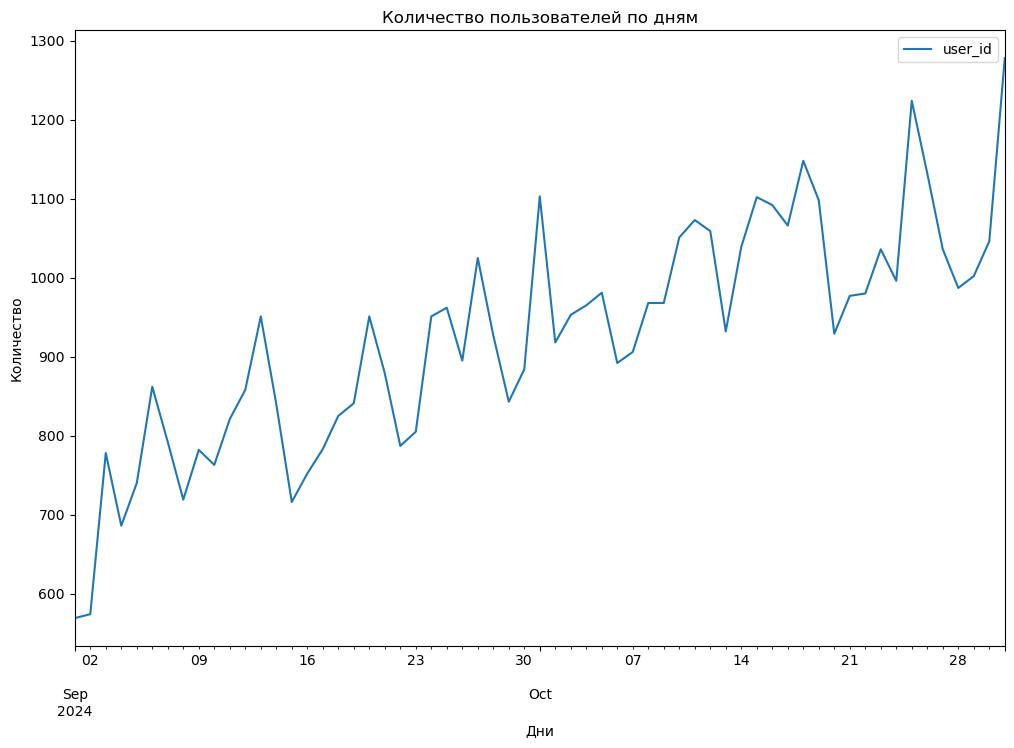

In [192]:
df_3.plot(kind='line', x='created_dt_msk', y='user_id')

# Настраиваем оси
plt.title('Количество пользователей по дням')
plt.xlabel('Дни')
plt.ylabel('Количество')

# Измените название осей и название графика
plt.show()

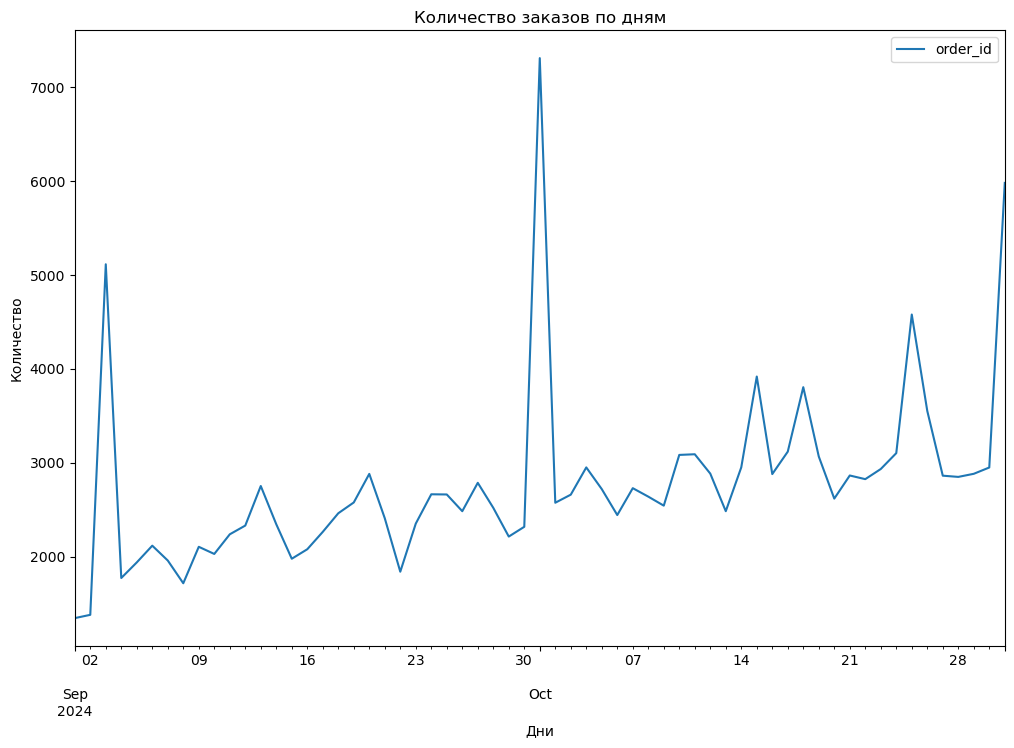

In [193]:
df_3.plot(kind='line', x='created_dt_msk', y='order_id')

# Настраиваем оси
plt.title('Количество заказов по дням')
plt.xlabel('Дни')
plt.ylabel('Количество')

# Измените название осей и название графика
plt.show()

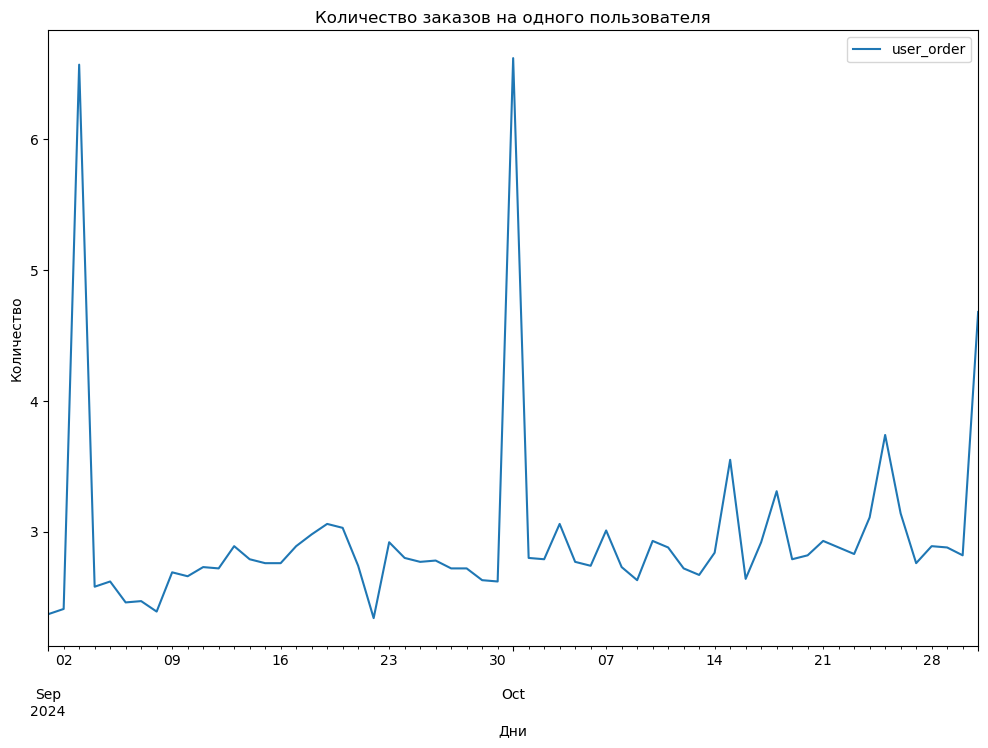

In [194]:
df_3.plot(kind='line', x='created_dt_msk', y='user_order')

# Настраиваем оси
plt.title('Количество заказов на одного пользователя')
plt.xlabel('Дни')
plt.ylabel('Количество')

# Измените название осей и название графика
plt.show()

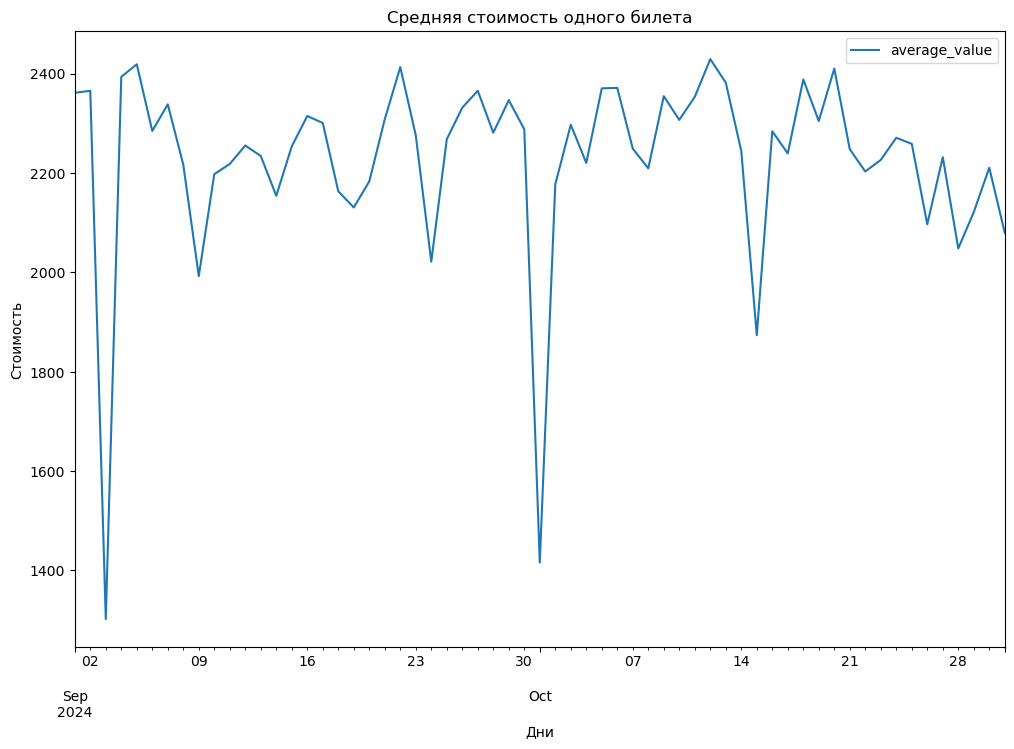

In [195]:
df_3.plot(kind='line', x='created_dt_msk', y='average_value')

# Настраиваем оси
plt.title('Средняя стоимость одного билета')
plt.xlabel('Дни')
plt.ylabel('Стоимость')

# Измените название осей и название графика
plt.show()

**Вывод**: 
- По количеству пользователей по днфм виден повышательный тренд от начала периода к концу
- Количесиво заказов по днфм имметт два пика
- Количество заказов на одного пользователя зависит от двух предыдущих графиков  и также имеет два пика в остальные дни достаточно стабильно
- Средняя стоимость одного билета имеет два минимума в остальынеи дни стабильно.

In [197]:
# 1️⃣ день недели: 0-Пн … 6-Вс
df_3['dow'] = df_3['created_dt_msk'].dt.dayofweek  

# 2️⃣ булев признак &laquo;выходной&raquo; (Сб-Вс)
df_3[df_3['dow'] >= 5].describe()    

,created_dt_msk,order_id,user_id,total,tickets_count,user_order,average_value,dow
count,17,17.000000,17.000000,1.700000e+01,17.000000,17.000000,17.000000,17.000000
mean,2024-09-30 04:14:07.058823424,2409.117647,890.058824,1.537493e+07,6670.941176,2.683529,2309.895294,5.529412
min,2024-09-01 00:00:00,1346.000000,569.000000,8.989775e+06,3807.000000,2.340000,2096.750000,5.000000
25%,2024-09-15 00:00:00,1978.000000,792.000000,1.260968e+07,5393.000000,2.630000,2253.690000,5.000000
50%,2024-09-29 00:00:00,2443.000000,892.000000,1.621760e+07,6874.000000,2.740000,2338.160000,6.000000
75%,2024-10-13 00:00:00,2719.000000,981.000000,1.770478e+07,7694.000000,2.770000,2371.230000,6.000000
max,2024-10-27 00:00:00,3551.000000,1132.000000,2.087528e+07,9956.000000,3.140000,2429.110000,6.000000
std,NaN,541.323942,148.375567,3.480646e+06,1574.394585,0.198272,93.808285,0.514496


In [198]:
#Цикличность в будни
df_3[df_3['dow'] < 5].describe() 

,created_dt_msk,order_id,user_id,total,tickets_count,user_order,average_value,dow
count,44,44.000000,44.000000,4.400000e+01,44.000000,44.000000,44.000000,44.000000
mean,2024-10-01 07:38:10.909090816,2920.636364,940.159091,1.712741e+07,8023.727273,3.071136,2194.995455,1.954545
min,2024-09-02 00:00:00,1381.000000,574.000000,8.773097e+06,3709.000000,2.410000,1301.950000,0.000000
25%,2024-09-16 18:00:00,2346.750000,837.000000,1.414712e+07,6265.750000,2.727500,2181.422500,1.000000
50%,2024-10-01 12:00:00,2740.500000,957.500000,1.659169e+07,7443.000000,2.860000,2245.955000,2.000000
75%,2024-10-16 06:00:00,2950.250000,1036.750000,1.822010e+07,8184.500000,2.987500,2297.970000,3.000000
max,2024-10-31 00:00:00,7306.000000,1278.000000,3.162524e+07,21877.000000,6.620000,2418.750000,4.000000
std,NaN,1063.032172,142.145838,4.718759e+06,3148.765785,0.859606,215.206393,1.413466


**Вывод**: Так в среднем больше заказов делается в будни 2920 против 2409,<br> 
чем на выходные, по будням больще активных пользователей 940 против 890, <br> 
меньше в среднем количество приобретеннных билетов, но при этом средняя <br>
стоимость билетов купленных в выходные выше

In [200]:
fall2024=df_final[df_final['season']=='осень'].copy()
region_stats = fall2024.groupby('region_name').agg(
    unique_events_r=('event_id', 'nunique'),
    count_orders_r=('order_id', 'count')).reset_index()  # Подсчет общего количества мероприятий и заказов

total_events = region_stats['unique_events_r'].sum()
total_orders = region_stats['count_orders_r'].sum()
# Добавление доли мероприятий от общего числа
region_stats['event_share'] = 100*region_stats['unique_events_r'] / total_events
# Добавление доли заказов от общего числа
region_stats['order_share'] = 100*region_stats['count_orders_r'] / total_orders
# Сортировка по количеству уникальных мероприятий
region_stats = region_stats.sort_values(by='unique_events_r', ascending=False)
display(region_stats)

,region_name,unique_events_r,count_orders_r,event_share,order_share
23,Каменевский регион,3930,47247,24.718536,27.880422
59,Североярская область,2617,20790,16.460155,12.268165
75,Широковская область,803,8739,5.050632,5.156878
56,Светополянский округ,764,4819,4.805334,2.843689
51,Речиновская область,529,3574,3.327253,2.109015
...,...,...,...,...,...
17,Залесский край,4,56,0.025159,0.033046
47,Островогорский округ,4,18,0.025159,0.010622
5,Верхозёрский край,2,11,0.012579,0.006491
55,Светолесский край,2,18,0.012579,0.010622


In [201]:
region_stats.describe()

,unique_events_r,count_orders_r,event_share,order_share
count,79.000000,79.000000,79.000000,79.000000
mean,201.253165,2145.101266,1.265823,1.265823
std,535.801376,5955.747676,3.370032,3.514483
min,1.000000,9.000000,0.006290,0.005311
25%,14.000000,185.500000,0.088056,0.109463
50%,60.000000,561.000000,0.377382,0.331046
75%,143.000000,1448.000000,0.899428,0.854464
max,3930.000000,47247.000000,24.718536,27.880422


In [202]:
service_stats=fall2024.groupby('service_name').agg(unique_events_s=('event_id','nunique'), \
                                                   count_orders_s=('order_id', 'count'), \
                                                   revenue_rub_s=('revenue_rub','sum')).reset_index()
total_events_s = service_stats['unique_events_s'].sum()
total_orders_s = service_stats['count_orders_s'].sum()
total_revenue = service_stats['revenue_rub_s'].sum()
# Добавление доли мероприятий от общего числа
service_stats['event_share'] = 100*service_stats['unique_events_s'] / total_events_s
# Добавление доли заказов от общего числа
service_stats['order_share'] = 100*service_stats['count_orders_s'] / total_orders_s
# Добавление доли выручкиот общего числа
service_stats['revenue_share'] = 100*service_stats['revenue_rub_s'] / total_revenue
# Сортировка по количеству уникальных мероприятий
service_stats = service_stats.sort_values(by='unique_events_s', ascending=False)
display(service_stats)

,service_name,unique_events_s,count_orders_s,revenue_rub_s,event_share,order_share,revenue_share
21,Лови билет!,3621,25855,10571697.17,20.900433,15.257018,12.443087
3,Билеты без проблем,2850,32471,12755046.78,16.450216,19.161115,15.012930
5,Билеты в руки,2471,25750,7686285.50,14.262626,15.195057,9.046903
25,Облачко,1412,15572,10887838.30,8.150072,9.189027,12.815191
22,Лучшие билеты,1396,12445,1735171.20,8.057720,7.343786,2.042329
24,Мой билет,1007,19537,11375903.54,5.812410,11.528770,13.389653
30,Тебе билет!,859,3779,2223909.32,4.958153,2.229985,2.617583
26,Прачечная,728,5831,2647691.55,4.202020,3.440869,3.116383
8,Весь в билетах,607,9572,9809310.33,3.503608,5.648431,11.545743
34,Яблоко,537,3495,2827527.72,3.099567,2.062397,3.328053


In [203]:
service_stats.describe()

,unique_events_s,count_orders_s,revenue_rub_s,event_share,order_share,revenue_share
count,35.000000,35.000000,3.500000e+01,35.000000,35.000000,35.000000
mean,495.000000,4841.800000,2.427440e+06,2.857143,2.857143,2.857143
std,873.964396,8610.694636,3.886971e+06,5.044528,5.081165,4.575038
min,1.000000,1.000000,3.001000e+01,0.005772,0.000590,0.000035
25%,8.500000,58.000000,2.684003e+04,0.049062,0.034226,0.031591
50%,132.000000,918.000000,6.093271e+05,0.761905,0.541711,0.717189
75%,572.000000,3637.000000,2.435800e+06,3.301587,2.146191,2.866983
max,3621.000000,32471.000000,1.275505e+07,20.900433,19.161115,15.012930


**Вывод** Всего регионов 79 в среднем в регионе проходило 201 меропритий и было сделано 2145 заказов, <br> 
средняя доля событий по регионам и доля заказов от общего составляет 1,26%. К лидерам относится <br>
Каменевский район с 3940 событиями и 47247 заказами, меньше всего в Сосновдолинской области 1 меропритие и 9 заказов.<br>
Всего билетных операторов 35 в среднем каждый из них организовывал 495 событий и 4841 заказов с средней выручкой 2,42 млн руб. средняя доля событий по организаторам, доля заказов и выручке от общего числа составляет 2,85%. <br> 
К лидерам относится Лови билет! с 4621 событиями, 25855 заказами и 10 млн руб выручки.

## Статистический анализ данных

H0: Среднее количество заказов на одного пользователя мобильного приложения не выше по сравнению с пользователями стационарных устройств. <br>
H1: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.    

In [207]:
df_test1=df_final[df_final['season']=='осень'].groupby(['created_dt_msk', 'device_type_canonical']).agg({'order_id':'count'}).reset_index()

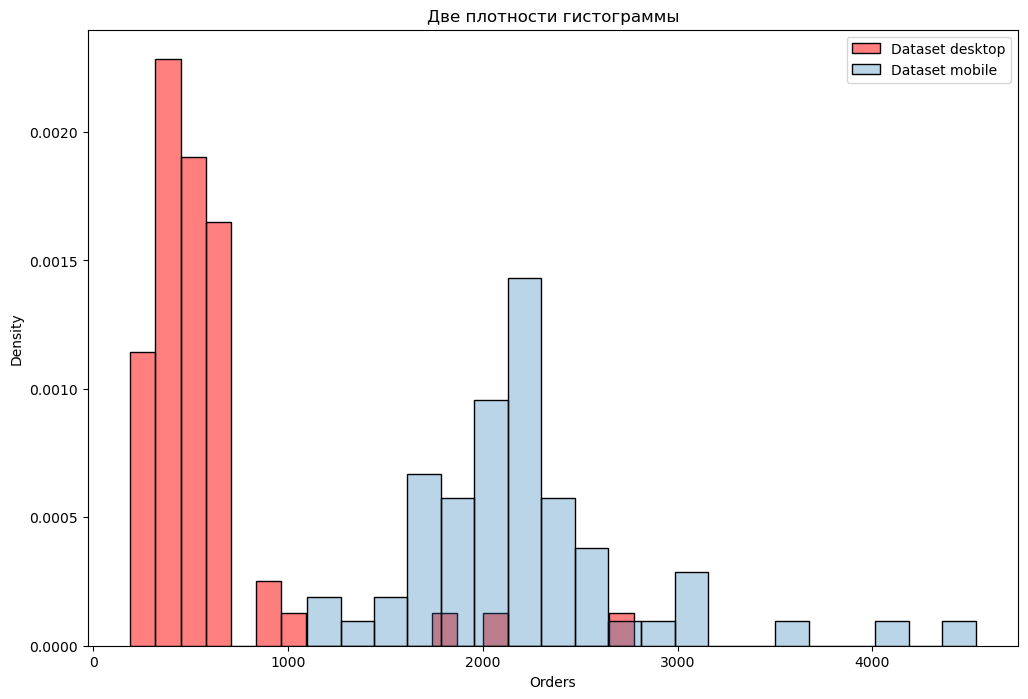

In [208]:
# Построим гистограмму для df1
sns.histplot(
    data=df_test1[df_test1['device_type_canonical']=='desktop'],
    x='order_id',
    stat='density',    # плотность, аналог 'density=True' в Matplotlib
    common_norm=False, # не делать нормировку совместной (каждый набор нормируется отдельно)
    bins=20,
    alpha=0.5,
    color='red',# полупрозрачность, чтобы оба распределения лучше различать
    label='Dataset desktop'
)

# Построим гистограмму для df2
sns.histplot(
    data=df_test1[df_test1['device_type_canonical']=='mobile'],
    x='order_id',
    stat='density',
    common_norm=False,
    bins=20,
    alpha=0.3,
    label='Dataset mobile'
)

plt.title("Две плотности гистограммы")
plt.xlabel("Orders")
plt.ylabel("Density")
plt.legend()

plt.show()

In [209]:
#Разобьем выборки на мобильную и стационарную
desktop_version = df_test1[df_test1['device_type_canonical']=='desktop'].order_id
mobile_version = df_test1[df_test1['device_type_canonical']=='mobile'].order_id

In [210]:
#Вычислим характеристики центра распределения
print(f'Desktop - среднее {desktop_version.mean()}, стандартное отклонение {desktop_version.std()}')
print(f'Mobile - среднее {mobile_version.mean()}, стандартное отклонение {mobile_version.std()}')

Desktop - среднее 565.5573770491803, стандартное отклонение 427.62115338190665
Mobile - среднее 2212.5245901639346, стандартное отклонение 590.4295500327812


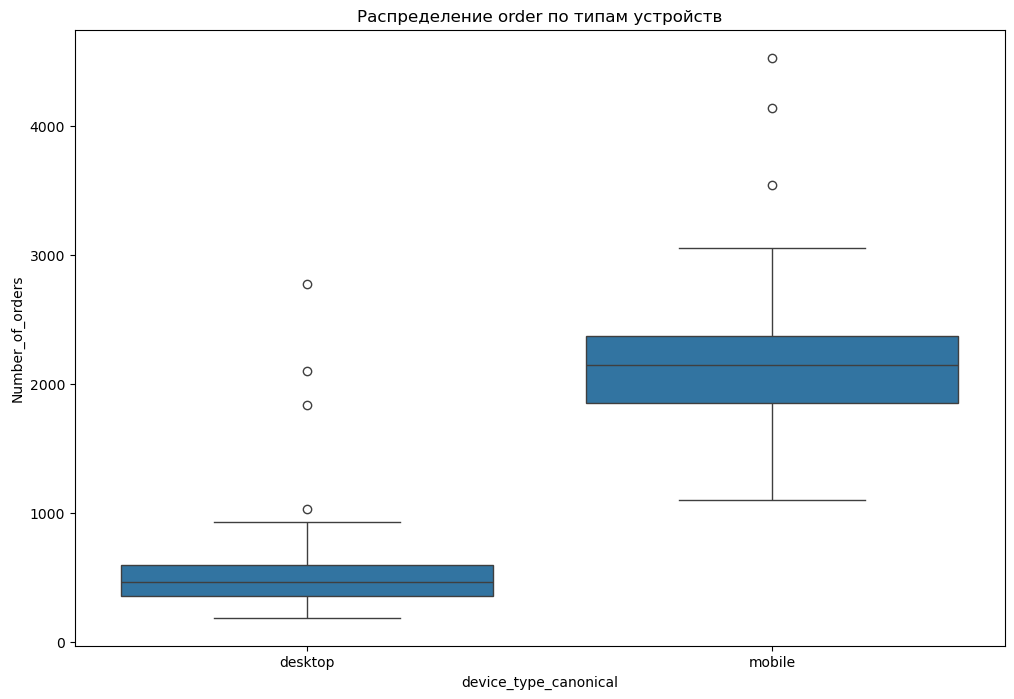

In [211]:
sns.boxplot(x='device_type_canonical',           # категория по оси X
            y='order_id',
            data=df_test1.query("device_type_canonical in ['desktop', 'mobile']"),
            order=['desktop', 'mobile'])        # фиксируем порядок RU&rarr;KZ

plt.title('Распределение order по типам устройств')
plt.xlabel('device_type_canonical')
plt.ylabel('Number_of_orders')
plt.show()

В связи с тем что по анализу графика распределения сильно отличаются как по среднему, так и по дисперсии, о равенстве, которой говорить не приходится. Поэтому применим тест Уэлча в случаи неравенства дисперсий так как мы видим отличие по дисперсии.

In [213]:
def print_stattest_results(p_value:float, alpha:float=0.05):
    # Напишите код для функции здесь
    if p_value>alpha:
        print(f'Полученное значение p_value={p_value} больше критического уровня alpha={alpha}. Опровергнуть нулевую гипотезу нельзя.')
    else:
        print(f'Полученное значение p_value={p_value} меньше критического уровня alpha={alpha}. Принимаем альтернативную гипотезу.')        


In [214]:
results = st.ttest_ind(mobile_version, desktop_version,  equal_var=False, alternative='greater') # Укажите подходящий инструмент здесь
p_value =results.pvalue
print_stattest_results(p_value)
mobile_mean =round(mobile_version.mean(),2)
desktop_mean =round(desktop_version.mean(),2)

print(f'Средняя количество заказов mobile {mobile_mean}')
print(f'Средняя количество заказов desktop {desktop_mean}')

Полученное значение p_value=4.471982944443812e-34 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Средняя количество заказов mobile 2212.52
Средняя количество заказов desktop 565.56


In [215]:
df_test2=df_final[df_final['season']=='осень'].groupby(['user_id', 'device_type_canonical']).agg(average_days=('days_since_prev','mean')).reset_index()

H0 Среднее время между заказами пользователей мобильных приложений не выше по сравнению с пользователями стационарных устройств. <br>
H1 Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

In [217]:
desktop_version_d = df_test2[df_test2['device_type_canonical']=='desktop']
mobile_version_d = df_test2[df_test2['device_type_canonical']=='mobile']

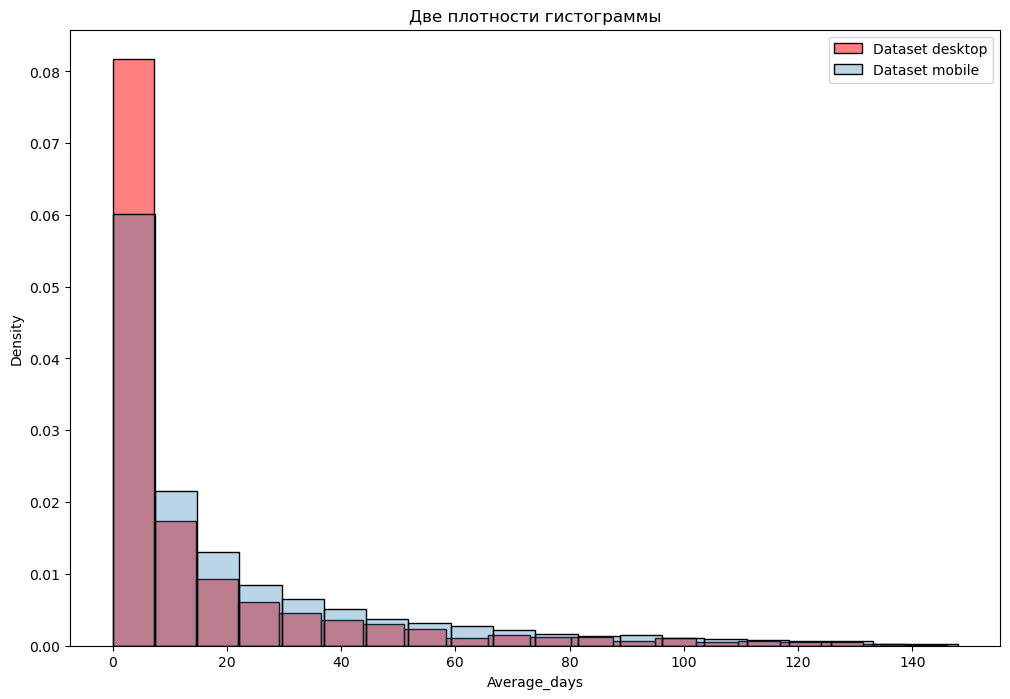

In [218]:
# Построим гистограмму для df1
sns.histplot(
    data=desktop_version_d,
    x='average_days',
    stat='density',    # плотность, аналог 'density=True' в Matplotlib
    common_norm=False, # не делать нормировку совместной (каждый набор нормируется отдельно)
    bins=20,
    alpha=0.5,
    color='red',# полупрозрачность, чтобы оба распределения лучше различать
    label='Dataset desktop'
)

# Построим гистограмму для df2
sns.histplot(
    data=mobile_version_d,
    x='average_days',
    stat='density',
    common_norm=False,
    bins=20,
    alpha=0.3,
    label='Dataset mobile'
)

plt.title("Две плотности гистограммы")
plt.xlabel("Average_days")
plt.ylabel("Density")
plt.legend()

plt.show()

In [219]:
desktop_version_mean = df_test2[df_test2['device_type_canonical']=='desktop'].average_days
mobile_version_mean = df_test2[df_test2['device_type_canonical']=='mobile'].average_days

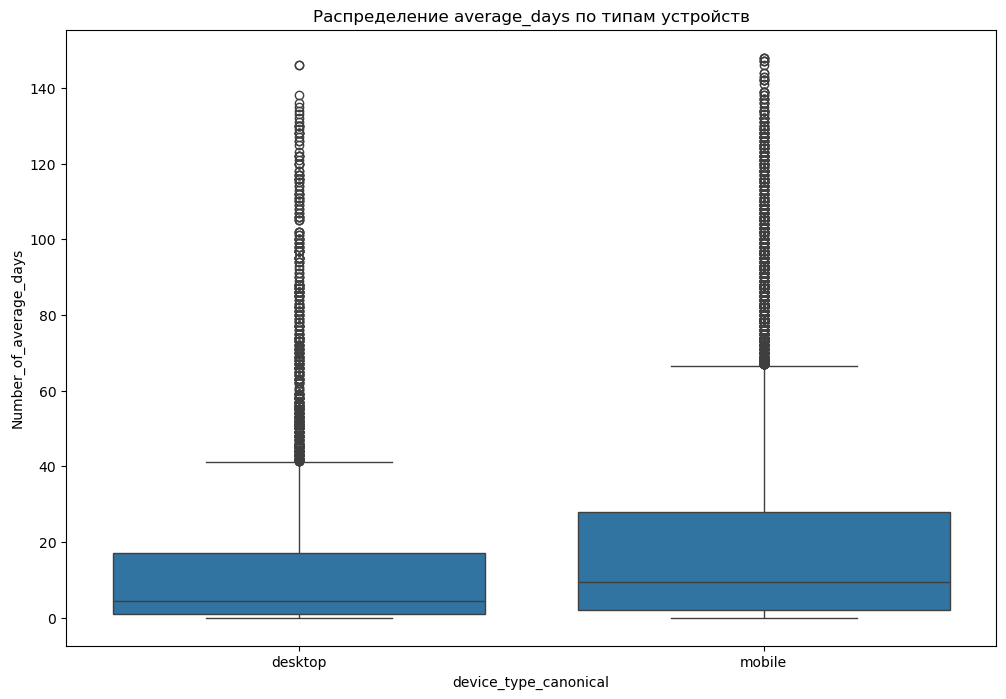

In [220]:
sns.boxplot(x='device_type_canonical',           # категория по оси X
            y='average_days',
            data=df_test2.query("device_type_canonical in ['desktop', 'mobile']"),
            order=['desktop', 'mobile'])        # фиксируем порядок RU&rarr;KZ

plt.title('Распределение average_days по типам устройств')
plt.xlabel('device_type_canonical')
plt.ylabel('Number_of_average_days')
plt.show()

In [221]:
#Вычислим характеристики центра распределения
print(f'Desktop - среднее {desktop_version_mean.mean()}, стандартное отклонение {desktop_version_mean.std()}')
print(f'Mobile - среднее {mobile_version_mean.mean()}, стандартное отклонение {mobile_version_mean.std()}')

Desktop - среднее 14.913741553156559, стандартное отклонение 24.2078767338134
Mobile - среднее 20.65510529680163, стандартное отклонение 27.374412349915193


Видим что часпределения досаточно похожи, но при этом у них несколько отличаются дисперсии, поэтому выберем тест Уэлча для поддверждения гипотезы о среднем количестве дней между покупками.  

In [223]:
results = st.ttest_ind(mobile_version_mean.dropna(), desktop_version_mean.dropna(),  equal_var=False, alternative='greater') # Укажите подходящий инструмент здесь
p_value =results.pvalue
print_stattest_results(p_value)
mobile_mean =round(mobile_version_mean.mean(),2)
desktop_mean =round(desktop_version_mean.mean(),2)

print(f'Средняя время между заказами в часах mobile {mobile_mean}')
print(f'Средняя время между заказами в часах desktop {desktop_mean}')

Полученное значение p_value=1.1439288532339942e-34 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Средняя время между заказами в часах mobile 20.66
Средняя время между заказами в часах desktop 14.91


**Вывод:** На основе двух проведенных тестов Уэлча делаем вывод среднее количество заказов пользователя <br>
мобильного приложения выше чем у стацонарного компьютера. Время между заказами пользователей на мобильном приложении выше чем на стационарном компьютере.   

## Выводы по итогам работы и рекомандации

**Информация по данным:**

Было дано три датасета, по датасету df_orders пропуски имееются только в столбце days_since_prev
по датасетам df_events и df_tenge пропусков нет ни по одному столбцу. В итоге было отобрано 287637 наблюдений, явных дубликатов не было обнаржено, было удалено 118 наблюдений признанных неявными дубликатов и 2 наблюдения по 99 персентилю, также был поменен тип данных по наюлюдениям типа дата и сконструированны необходимые столбцы по месяцам, сезонам

**Востребованные мероприятия**

- Наиболее востребованными мероприятими в оба время годы являются концерты, театр и другое. 
- Стоимость билетов по отношению лето к осень уменьшилась, кроме двух типов мероприятий стендап и выставки по ним средняя стомость билетов выросла. 
- Средняя стоимость билета колебалась от 2000 до 2400 при этом в дни видимо распродаж падала стоимость билета при этом значительно росли количество заказов на 1 пользователя. 
- При изучении пользовательской активности можно сделать вывод, что так в среднем больше заказов делается в будни 2920 против 2409, чем на выходные, по будням больще активных пользователей 940 против 890, меньше в среднем количество приобретеннных билетов, но при этом средняя стоимость билетов купленных в выходные выше
- К лидерам относится Каменевский район с 3930 событиями и 47247 заказами, меньше всего в Сосновдолинской области 1 события 9 заказов. К лидерам относится Лови билет! с 3621 событиями и 25855 заказами.

**Результаты проверки гипотез**:

На основе проведенных тестов подвердились гипотезы что количество заказов на 1 мобильного пользователя выше чем у стационарного и то что среднее время у мобильных пользователей выше, чем у стационарныых пользователей. В связи с разницей в дисперсии оба раза использовался тест Уэлча.

**Рекомендации**: Хотелось бы отражения в данных от сервиса возможной ценовой политики таких как арбитраж такой как допустим разные цены на билеты в зависимости от региона пользователя, также можно в завимости от типа устройств тоже начать дискриминировать пользователей, дополнительные меры, которые могут получать дополнительный доход в завимости от востребованности мероприйтий. Допустим если время между покупками на мероприятия растет вводить динамические цены, которые растут в завимсимости от спроса, чтобы видно на графике при изменении спроса изменения цены на билеты.